The spike and slab prior distribution as described by [Andersen et al. 2017](https://jmlr.csail.mit.edu/papers/volume18/15-464/15-464.pdf):
$$
p(x \mid p, \mu, \sigma) = \left(1-p\right) \delta(x) + p \mathcal{N}\left(x \mid \mu, \sigma\right)
$$


In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def plot(t, xt, title=''):
    f, ax = plt.subplots(1, 1, figsize=(12, 2))
    ax.plot(t, xt)
    ax.set(xlabel='Time (s)', ylabel='Signal', title=title)
    plt.show()
    return

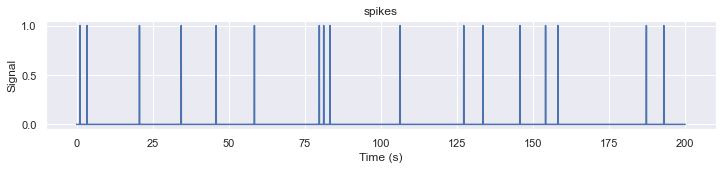

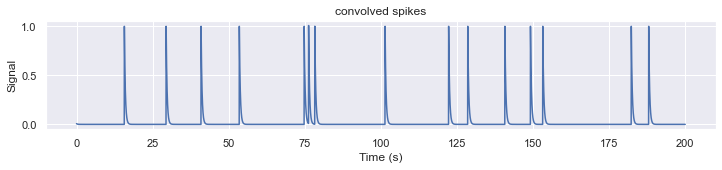

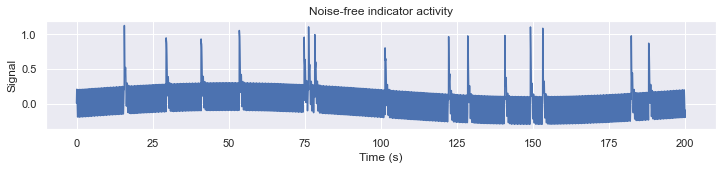

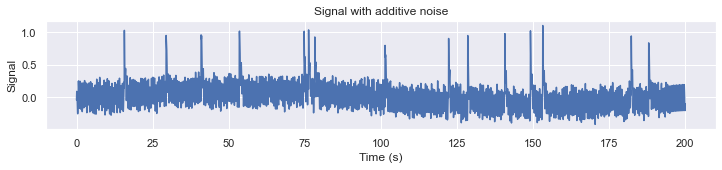

In [3]:
p = 0.25*1e-2
mu = 0
sigma = 0.025

sampling_interval = 0.04
recording_duration = 200

# Generate spikes
t = np.arange(0, recording_duration, sampling_interval)
x_unif = np.random.random(t.size)
xt = np.zeros(t.size)
xt[x_unif <= p] = 1

plot(t=t, xt=xt, title='spikes')

# Convolve with exponentially decaying kernel
half_decay = 0.3  # Half decay time of the indicator
t_window = np.arange(0, 10, 0.04)
kernel_decay = 1 * np.exp(-(1/half_decay)*t_window)
xt = signal.convolve(xt, kernel_decay, mode='same')

plot(t=t, xt=xt, title='convolved spikes')

# Slow varying activity
xt = xt + 0.1 * np.sin(2*np.pi*0.005*t) + 0.2 * np.sin(2*np.pi*2*t)

plot(t=t, xt=xt, title='Noise-free indicator activity')

# Additive noise
xt_gauss = np.random.normal(mu, sigma, size=xt.size)
xt_noise = signal.convolve(xt_gauss, kernel_decay, mode='same')
xt = xt + xt_noise

plot(t=t, xt=xt, title='Signal with additive noise')

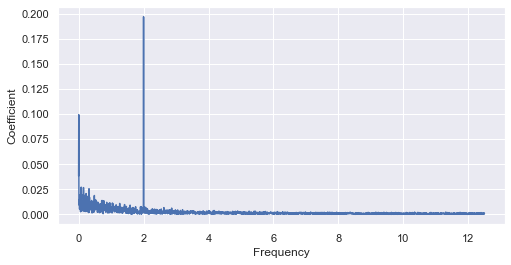

In [4]:
from scipy.fft import fft, fftfreq

xf = fft(xt)
f = fftfreq(xt.size, sampling_interval)[:(xt.size//2)]
_, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(f, (2.0/xt.size) * np.abs(xf[0:(xt.size//2)]))
ax.set(xlabel='Frequency', ylabel='Coefficient')
plt.show()
